## Importing libraries

In [1]:
from visualizations import show_results, get_experiment_results, get_column_names

## setting up expriment related variables

#### important variable names

In [2]:
columns = ["algo", "experiment_id", "dataset", "seed", "generation", "training_fitness", "timing", "pop_node_count"]
logger_name = "liah_logger.csv"
log_level = 1

## Analysing the results

In [3]:
df = get_experiment_results(experiment_id=-1, logger_name=logger_name)
df.head()

,algo,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,nodes_count
0,SlimGSGP_2_mul.csv,a22dfdaa-e8b8-11ee-948f-badda4640570,toxicity,0,0,2204.756592,0.155040,1654.0,1993.726440,8
1,SlimGSGP_2_mul.csv,a22dfdaa-e8b8-11ee-948f-badda4640570,toxicity,0,1,2204.756592,0.305280,4027.0,1993.726440,8
2,SlimGSGP_2_mul.csv,a22dfdaa-e8b8-11ee-948f-badda4640570,toxicity,0,2,2194.807129,0.101154,2492.0,1992.562744,50
3,SlimGSGP_2_mul.csv,a22dfdaa-e8b8-11ee-948f-badda4640570,toxicity,0,3,2194.807129,0.104621,4211.0,1992.562744,50
4,SlimGSGP_2_mul.csv,a22dfdaa-e8b8-11ee-948f-badda4640570,toxicity,0,4,2194.365479,0.084379,3037.0,1992.563354,19


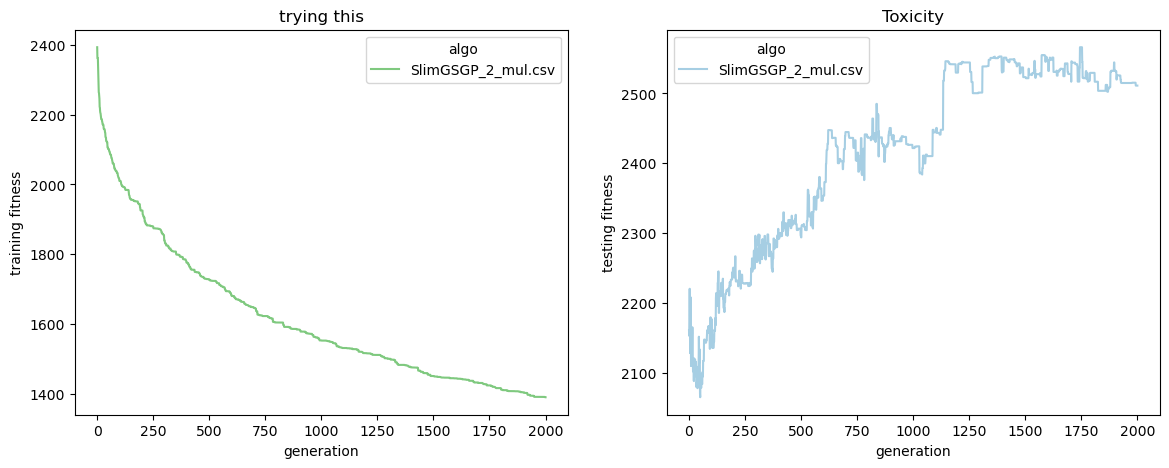

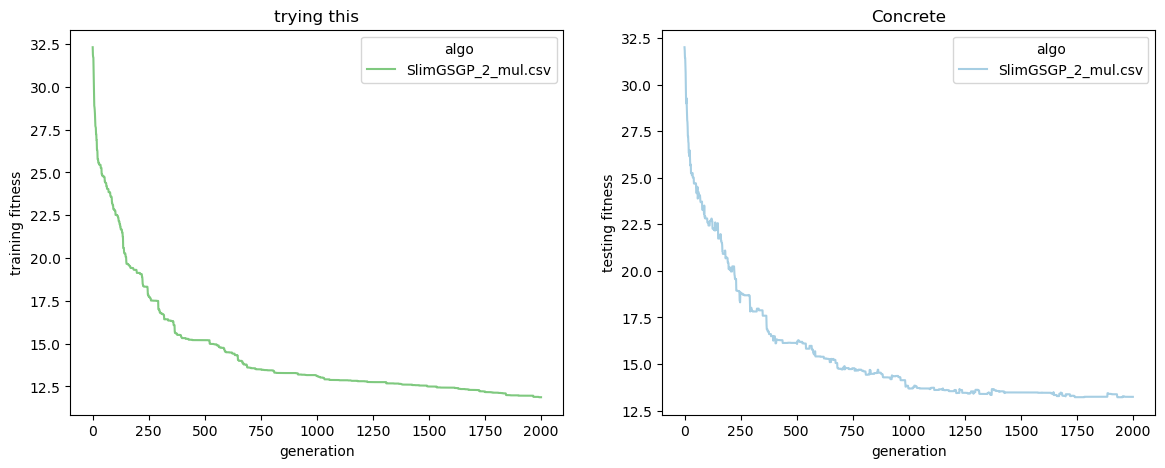

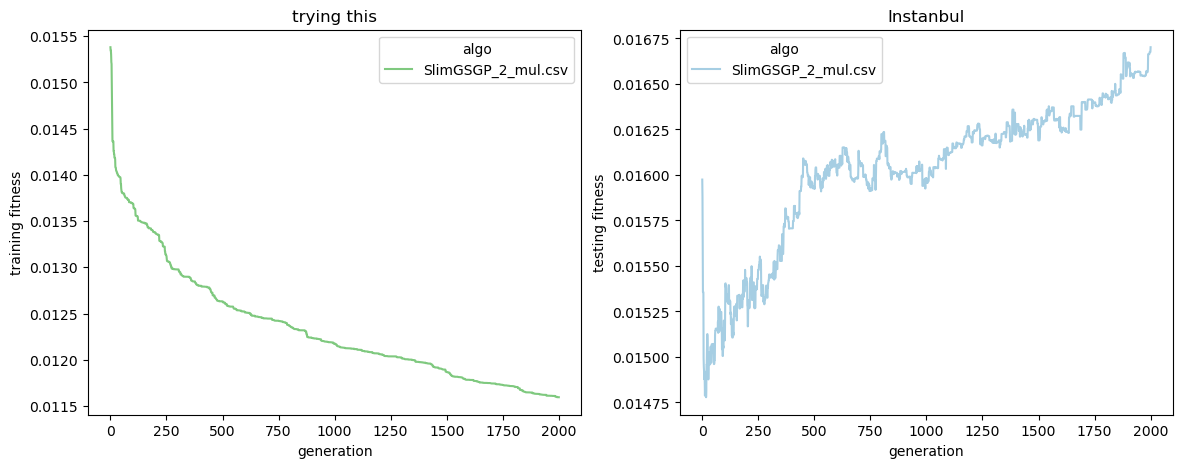

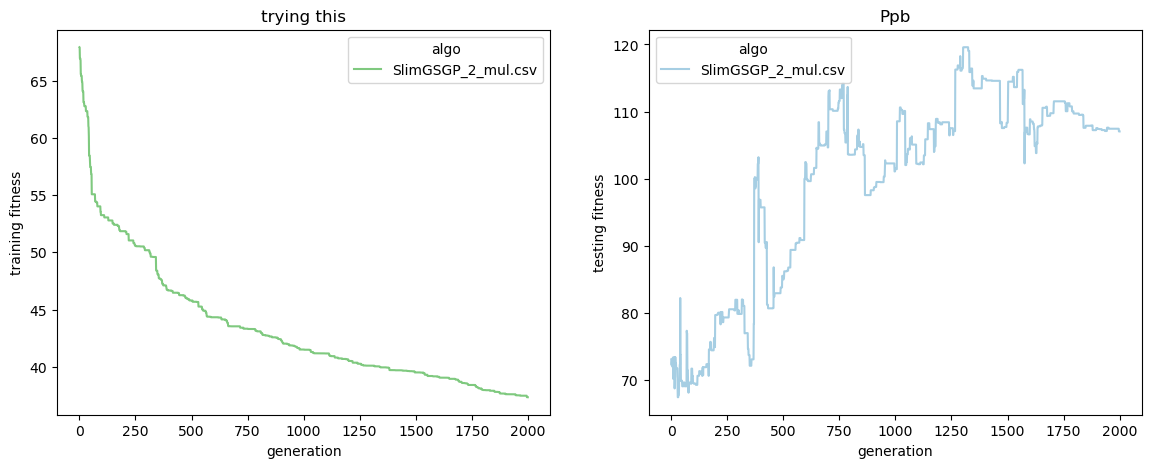

In [4]:
show_results(x_var = "generation", y_var="training_fitness", experiment_id=-1, logger_name=logger_name,
             log_level=log_level, dataset=None)

### extra code for later

In [5]:
# df["pop_fitnesses"].map(lambda x: torch.tensor([float(val.split("tensor(")[-1][:-1]) for val in x.split()]))

In [6]:
df[df.dataset=="ppb"].seed.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])